# Natural Language Processing

#### Process:
   - Compile documents
   - Featurize´the documents
   - Compare their features
   
#### Example:
   - Compile 2 docs 
       - 'blue house'
       - 'red house'
   - Featurize:
       * "bag of words": A document represented as a vector of word count. 
           - (red,blue,house) --> (0,1,1)
           - (red,blue,house) --> (1,0,1)
       * TF-IDF (Term Frequency - Inverse Document Frequency): We can improve on bag of words by adjusting word counts based on their frequency in the corpus (all documents).
   - Compare
       
        * You can use cosine similarity on the document vectors to determine similarity

#### TF-IDF:
* Term Frequency: Importance of the term within that document.
    * TF(d,t) = Number of occurences t in the document d.
* Inverse Document Frequency: Importance of the term in the corpus.
    * IDF(t) = log(D/t) where D is total documents and t is number of documents with the term
    
* Equation:
    `tfidf = Freq_t_in_d * log(D/t)`

## Get Data

In [2]:
import nltk

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
messages = [line.rstrip() for line in open('files/SMSSpamCollection')]

In [5]:
# Number of messages
len(messages)

5574

In [8]:
# Example of a message
messages[100]

"ham\tPlease don't text me anymore. I have nothing else to say."

* Ham = Relevant message. 
* Spam = Irrelevant message.

In [10]:
# Print first ten messages to see ham vs. spam
for msg_num,msg in enumerate(messages[0:10]):
    print(msg_num, msg)
    print('----')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
----
1 ham	Ok lar... Joking wif u oni...
----
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
----
3 ham	U dun say so early hor... U c already then say...
----
4 ham	Nah I don't think he goes to usf, he lives around here though
----
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
----
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
----
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
----
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 

## Create a dataframe 

In [11]:
import pandas as pd

In [12]:
messages = pd.read_csv('files/SMSSpamCollection', sep='\t', names=['label','message'])

In [13]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Explore Data

#### Ham vs. Spam Breakdown

In [14]:
# 4825 ham messages (4516 unique) and 747 spam (653 unique). 
messages.groupby(by='label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

#### Message length

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
# Create a new feature message length
messages['length'] = messages['message'].apply(len)

In [17]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


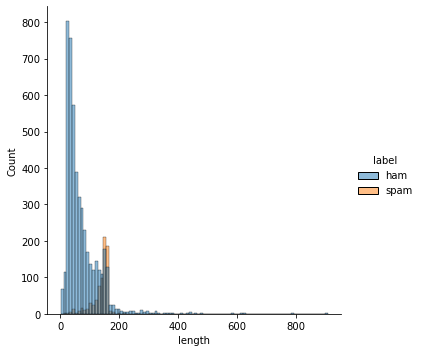

In [20]:
# bimodal distribution
# Ham is right skewed and overall shorter (40 chars)
# Spam is left skewed and overall longer (160 chars)
sns.displot(data=messages,x='length',hue='label')

## Text Processing

### Normalization

#### Remove punctuation (example)

In [25]:
import string

In [28]:
df = {}
for num,line in enumerate(messages['message'][:10]):
    nopunc = [char for char in line if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = nopunc.split()
    df[f'message {num}'] = nopunc

In [29]:
df

{'message 0': ['Go',
  'until',
  'jurong',
  'point',
  'crazy',
  'Available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'Cine',
  'there',
  'got',
  'amore',
  'wat'],
 'message 1': ['Ok', 'lar', 'Joking', 'wif', 'u', 'oni'],
 'message 2': ['Free',
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'FA',
  'Cup',
  'final',
  'tkts',
  '21st',
  'May',
  '2005',
  'Text',
  'FA',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'rateTCs',
  'apply',
  '08452810075over18s'],
 'message 3': ['U',
  'dun',
  'say',
  'so',
  'early',
  'hor',
  'U',
  'c',
  'already',
  'then',
  'say'],
 'message 4': ['Nah',
  'I',
  'dont',
  'think',
  'he',
  'goes',
  'to',
  'usf',
  'he',
  'lives',
  'around',
  'here',
  'though'],
 'message 5': ['FreeMsg',
  'Hey',
  'there',
  'darling',
  'its',
  'been',
  '3',
  'weeks',
  'now',
  'and',
  'no',
  'word',
  'back',
  'Id',
  'like',
  'some',

#### Remove stop words (example)

In [21]:
from nltk.corpus import stopwords

In [22]:
# common stop words in English
stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
for msg in df:
    df[msg] = [word for word in df[msg] if word.lower() not in stopwords.words('English')]
df

['Go', 'jurong', 'point', 'crazy', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'got', 'amore', 'wat']
['Ok', 'lar', 'Joking', 'wif', 'u', 'oni']
['Free', 'entry', '2', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', 'Text', 'FA', '87121', 'receive', 'entry', 'questionstd', 'txt', 'rateTCs', 'apply', '08452810075over18s']
['U', 'dun', 'say', 'early', 'hor', 'U', 'c', 'already', 'say']
['Nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']
['FreeMsg', 'Hey', 'darling', '3', 'weeks', 'word', 'back', 'Id', 'like', 'fun', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'send', '£150', 'rcv']
['Even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']
['per', 'request', 'Melle', 'Melle', 'Oru', 'Minnaminunginte', 'Nurungu', 'Vettam', 'set', 'callertune', 'Callers', 'Press', '9', 'copy', 'friends', 'Callertune']
['WINNER', 'valued', 'network', 'customer', 'selected', 'receivea', '£900', 'prize', 'reward', 'claim', 

{'message 0': ['Go',
  'jurong',
  'point',
  'crazy',
  'Available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'Cine',
  'got',
  'amore',
  'wat'],
 'message 1': ['Ok', 'lar', 'Joking', 'wif', 'u', 'oni'],
 'message 2': ['Free',
  'entry',
  '2',
  'wkly',
  'comp',
  'win',
  'FA',
  'Cup',
  'final',
  'tkts',
  '21st',
  'May',
  '2005',
  'Text',
  'FA',
  '87121',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'rateTCs',
  'apply',
  '08452810075over18s'],
 'message 3': ['U', 'dun', 'say', 'early', 'hor', 'U', 'c', 'already', 'say'],
 'message 4': ['Nah',
  'dont',
  'think',
  'goes',
  'usf',
  'lives',
  'around',
  'though'],
 'message 5': ['FreeMsg',
  'Hey',
  'darling',
  '3',
  'weeks',
  'word',
  'back',
  'Id',
  'like',
  'fun',
  'still',
  'Tb',
  'ok',
  'XxX',
  'std',
  'chgs',
  'send',
  '£150',
  'rcv'],
 'message 6': ['Even',
  'brother',
  'like',
  'speak',
  'treat',
  'like',
  'aids',
  'patent'],
 'message 7': ['per',
  

#### Do the two steps with actual text data

In [56]:
# Function that tokenizes text message
def text_process(msg):
    """ 
    1. Remove punctuation
    2. Remove stop words
    3. Return list of clean text words
    Opt: For future, also do stemming (break down words into stems to add up derived words) and other text normalization methods
    """
    # Remove punctuation
    nopunc = [char for char in msg if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    # Remove stop words
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('English')]
    # Return list of clean words
    return clean

### Vectorization 
Steps:
   1. Count how many times does a word occur in each message (TF)
   2. Weigh the counts, so that frequent tokens get lower weight (IDF)
   3. Normalize the vectors to unit length to abstract from the original text length (L2 normalization)
   
#### Count the words

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
# Create bag of words transformer
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [55]:
# 11,425 words in our vocabulary
len(bow_transformer.vocabulary_)

11425

In [62]:
# Example

# Message #7 in our corpus
msg7 = messages['message'][6] 
# Transform using our vectorizer
bow7 = bow_transformer.transform([msg7])
# Has 7 clean words, one of the words appears twice
print(bow7)

  (0, 1802)	1
  (0, 4590)	1
  (0, 5193)	1
  (0, 7800)	2
  (0, 8761)	1
  (0, 9971)	1
  (0, 10629)	1


In [63]:
# Check which word appears twice
bow_transformer.get_feature_names()[7800] # the word like appears twice

'like'

In [64]:
# Transform the entire dataframe of messages 
messages_bow = bow_transformer.transform(messages['message'])
print(f'Sparse matrix shape: {messages_bow.shape}')

Sparse matrix shape: (5572, 11425)


In [66]:
# See how many non-zero values
print(f'Non-zero occurrences: {messages_bow.nnz}') # 50,548 non-zeros of 63,660,100 slots

Non-zero occurrences: 50548


In [67]:
# Calculate sparsity
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity)) # 0.0794% sparse

sparsity: 0.07940295412668218


#### Weigh the words

In [68]:
from sklearn.feature_extraction.text import TfidfTransformer

In [70]:
# Create TF-IDF transformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [73]:
# Example

# Transform 7th message to get weights
tfidf7 = tfidf_transformer.transform(bow7)
# Each of the 7 clean words now has a TF-IDF score
print(tfidf7)

  (0, 10629)	0.3352766696931058
  (0, 9971)	0.3268691780062757
  (0, 8761)	0.43700993321905807
  (0, 7800)	0.41453906826037096
  (0, 5193)	0.33843411088434017
  (0, 4590)	0.43700993321905807
  (0, 1802)	0.3352766696931058


In [74]:
# How to get idf score of any word in corpus
tfidf_transformer.idf_[bow_transformer.vocabulary_['love']]

4.773658523649919

In [75]:
# Transform the entire message corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)

## Split data into train and test 

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = messages['message']
y = messages['label']
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3)

## Modelling

### Naive Bayes

####  Build and train model

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [79]:
from sklearn.pipeline import Pipeline

In [81]:
# build pipeline
nb_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', MultinomialNB())
])

In [82]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fd19128c5e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

#### Make predictions

In [83]:
nb_pred = pipeline.predict(X_valid)

#### Evaluate model performance

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

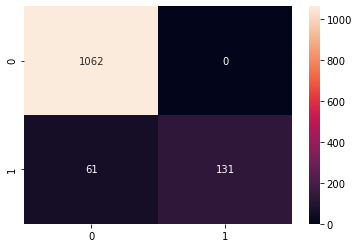

In [85]:
# 1062 TN, 0 FP, 61 FN, 131 TP
sns.heatmap(confusion_matrix(y_valid,nb_pred),annot=True,fmt='g')

In [86]:
# 95% accuracy, precision, recall, f1 score
print(classification_report(y_valid,nb_pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1062
        spam       1.00      0.68      0.81       192

    accuracy                           0.95      1254
   macro avg       0.97      0.84      0.89      1254
weighted avg       0.95      0.95      0.95      1254



### Logistic Regression

####  Build and train model

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
# build pipeline
lr_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', LogisticRegression(max_iter=2000))
])

In [89]:
lr_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fd19128c5e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression(max_iter=2000))])

#### Make predictions

In [90]:
lr_pred = lr_pipeline.predict(X_valid)

#### Evaluate model performance

<AxesSubplot:>

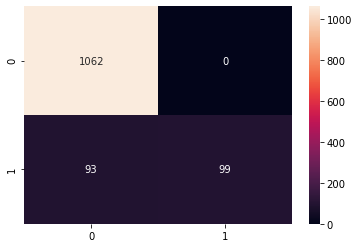

In [91]:
# 1062 TN, 0 FP, 93 FN, 99 TP
sns.heatmap(confusion_matrix(y_valid,lr_pred),annot=True,fmt='g')

In [92]:
# 93% accuracy, 93% precision, 93% recall, 92% f1 score
print(classification_report(y_valid,lr_pred))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96      1062
        spam       1.00      0.52      0.68       192

    accuracy                           0.93      1254
   macro avg       0.96      0.76      0.82      1254
weighted avg       0.93      0.93      0.92      1254



### K Nearest 

####  Build and train model

#### Make predictions

#### Evaluate model performance

### Logistic Regression

####  Build and train model

#### Make predictions

#### Evaluate model performance

### Logistic Regression

####  Build and train model

#### Make predictions

#### Evaluate model performance